# Stellar Classification: Exploring Machine Learning Techniques for Star Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve

# Step 2

### 2.1

In [2]:
file_path = 'star_classification.csv'
df = pd.read_csv(file_path)
df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [3]:
# subsample_size = 0.1
# df = df.sample(frac=subsample_size, random_state=42)

### 2.2

In [4]:
print("Basic information about the data:")
print(df.info())

Basic information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int6

In [5]:
print("\nSize of the dataset:")
print(df.shape)


Size of the dataset:
(100000, 18)


In [6]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230   

### 2.3

In [7]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [8]:
df.fillna(df.mean(), inplace=True)

<ipython-input-8-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


### 2.4

In [9]:
df['MJD'] = pd.to_datetime(df['MJD'], unit='D', origin='1858-11-17')

In [10]:
df['magnitude'] = df[['u', 'g', 'r', 'i', 'z']].sum(axis=1)

MJD stands for Modified Julian Date. It's a timekeeping system that represents the number of days that have passed since November 17, 1858, at 00:00 UTC (Coordinated Universal Time), but using Julian days (where each day starts at noon).


In astronomy and astrophysics, magnitude often refers to the measure of brightness of celestial objects. The 'u', 'g', 'r', 'i', and 'z' columns in your dataset could potentially represent the brightness of stars in different wavelength bands or filters.

In [11]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,magnitude
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,2013-03-03,171,104.50857
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,2018-02-09,427,112.97630
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,2011-01-31,299,106.83356
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,2017-10-13,775,107.27964
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,2012-09-17,842,85.03665


### 3.1

In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
statistics = numeric_columns.describe()
print(statistics)

             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

### 3.2

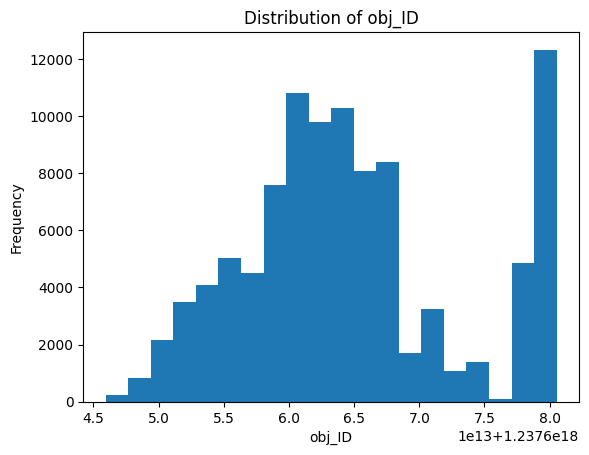

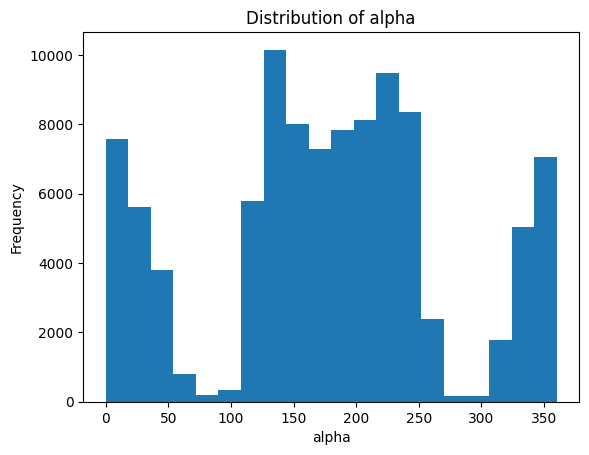

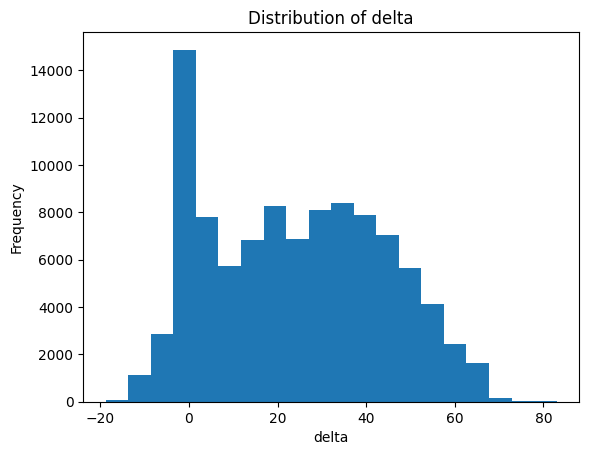

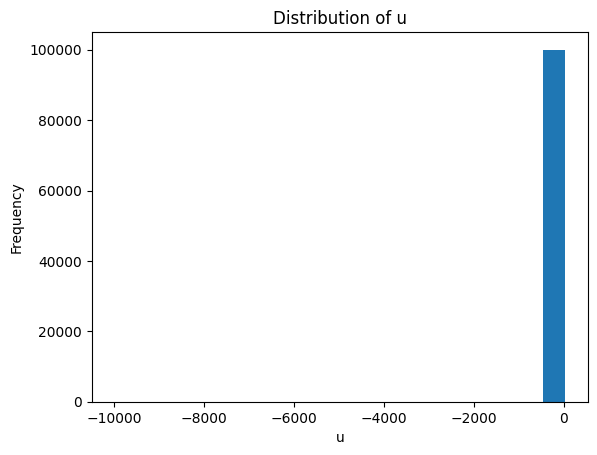

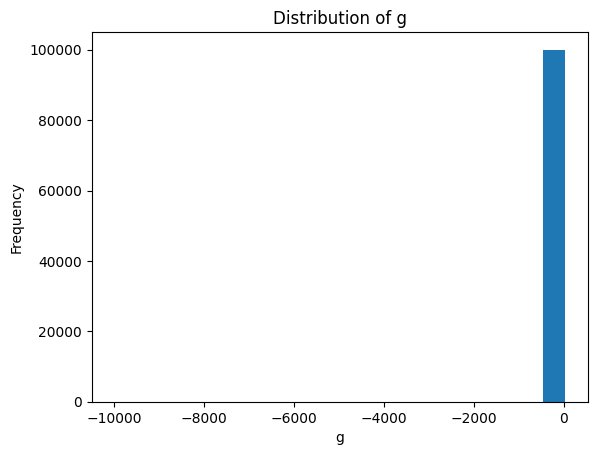

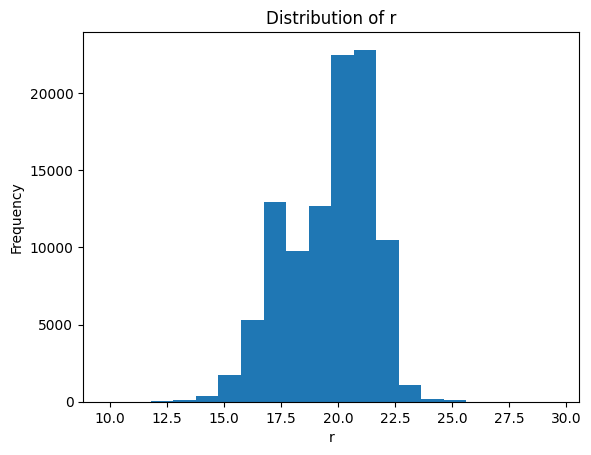

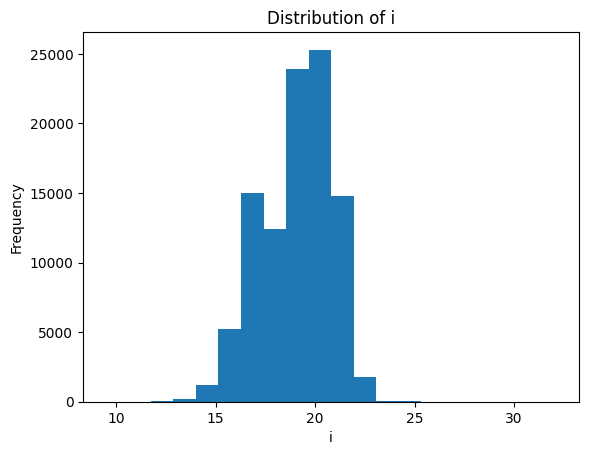

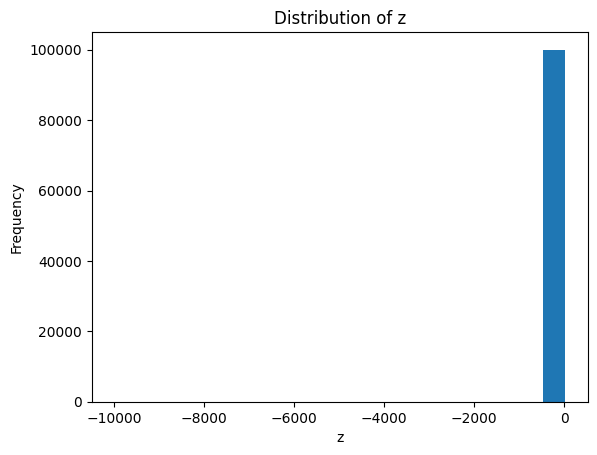

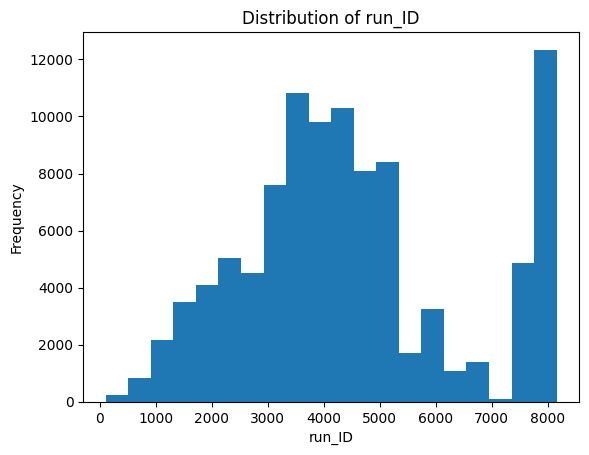

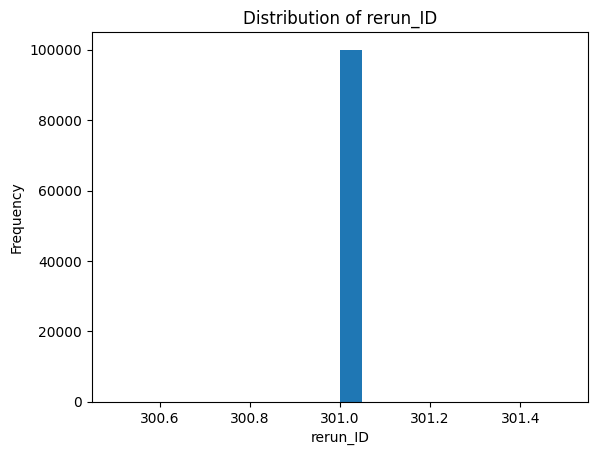

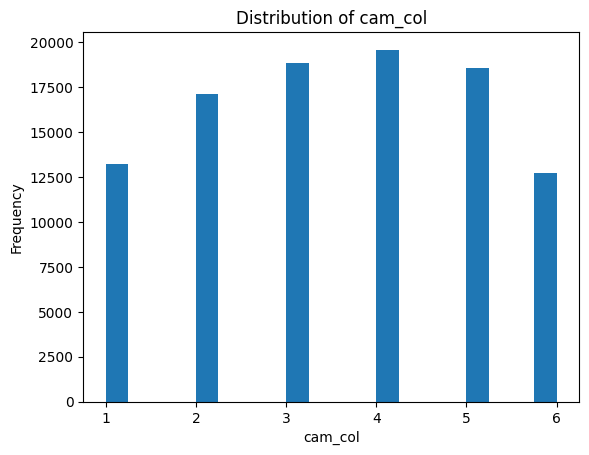

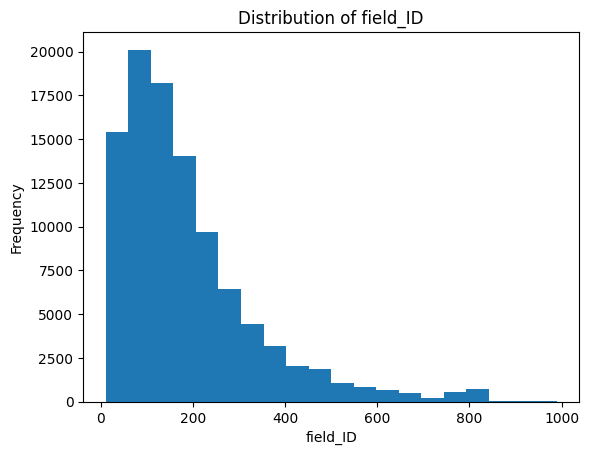

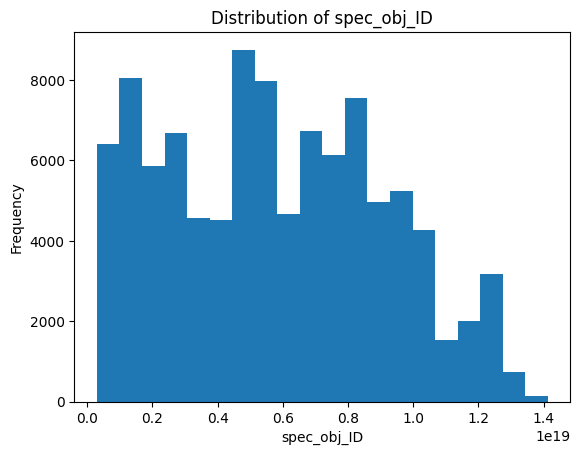

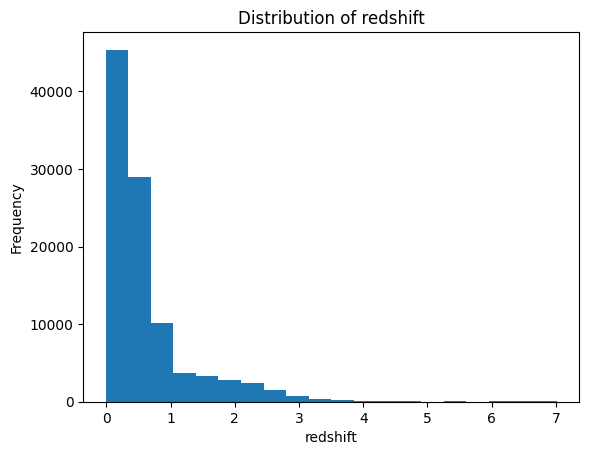

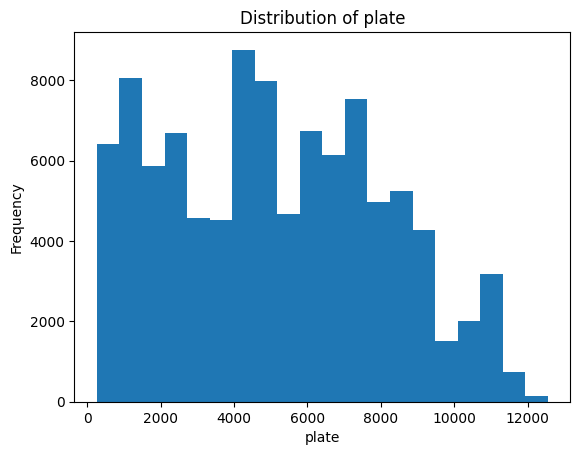

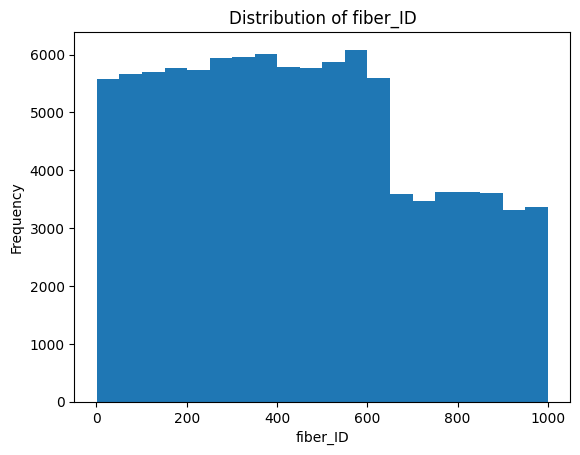

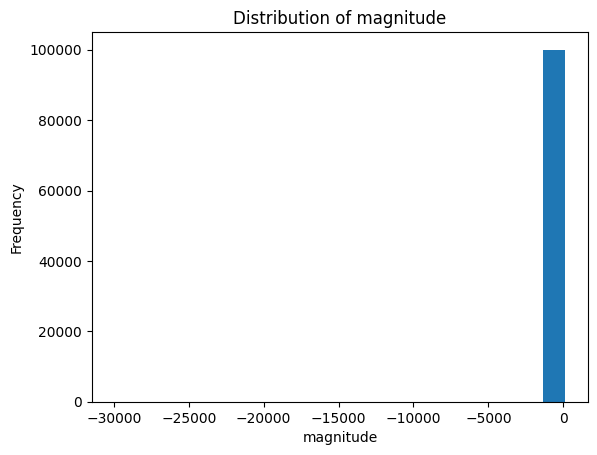

In [13]:
for column in numeric_columns.columns:
    plt.hist(df[column], bins=20)  # Adjust bins as needed
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

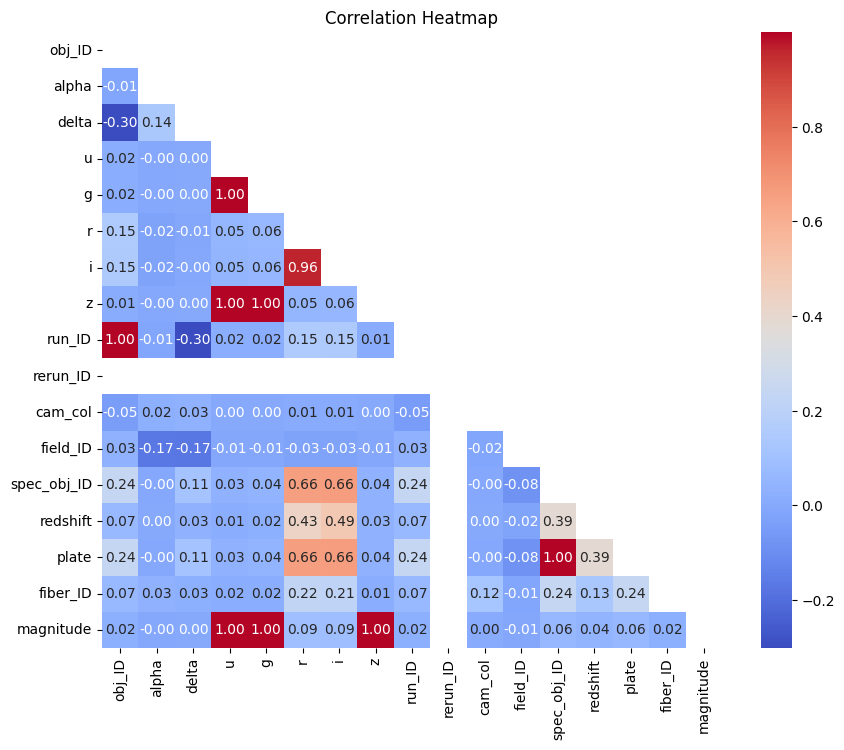

In [14]:
correlation_matrix = df[numeric_columns.columns].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()


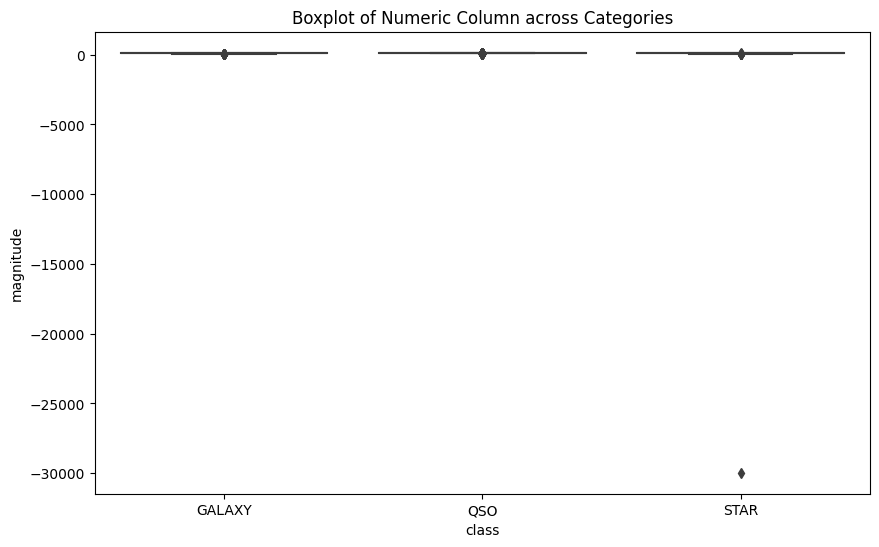

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='magnitude', data=df)
plt.title('Boxplot of Numeric Column across Categories')
plt.show()

# Step - 4

In [16]:
df = df.drop('MJD', axis=1)

In [17]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 1. Logistic Regression

In [36]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logreg = GridSearchCV(estimator=logreg_model, param_grid=param_grid_logreg, cv=3)
grid_search_logreg.fit(X_train, y_train)

print("Best Parameters:", grid_search_logreg.best_params_)

best_logreg_model = grid_search_logreg.best_estimator_
y_pred_tuned_logreg = best_logreg_model.predict(X_test)

print("Tuned Logistic Regression Performance:")
print(classification_report(y_test, y_pred_tuned_logreg))
print("Accuracy (Tuned Model):", accuracy_score(y_test, y_pred_tuned_logreg))

Logistic Regression Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      GALAXY       0.61      0.98      0.75     11860
         QSO       0.51      0.12      0.19      3797
        STAR       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.37      0.37      0.31     20000
weighted avg       0.46      0.60      0.48     20000

Accuracy: 0.60265
Best Parameters: {'C': 0.001}
Tuned Logistic Regression Performance:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      GALAXY       0.61      0.98      0.75     11860
         QSO       0.51      0.12      0.19      3797
        STAR       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.37      0.37      0.31     20000
weighted avg       0.46      0.60      0.48     20000

Accuracy (Tuned Model): 0.60265


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


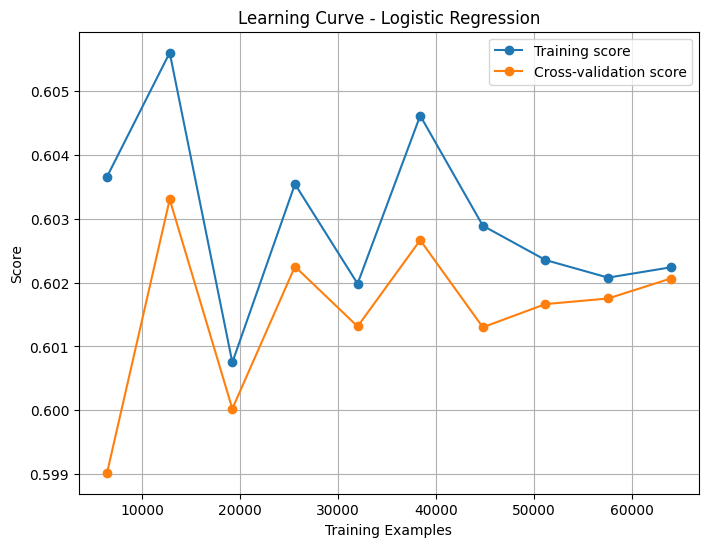

In [37]:
train_sizes, train_scores, val_scores = learning_curve(
    logreg_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score', marker='o')

plt.title('Learning Curve - Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# 2. Decision Tree Classifier

In [18]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     11860
         QSO       0.91      0.91      0.91      3797
        STAR       1.00      1.00      1.00      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

Accuracy: 0.96405


In [20]:
param_grid_dt = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3)
grid_search_dt.fit(X_train, y_train)
print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10}


In [21]:
best_dt_model = grid_search_dt.best_estimator_
y_pred_tuned_dt = best_dt_model.predict(X_test)
print("Tuned Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_tuned_dt))
print("Accuracy (Tuned Model):", accuracy_score(y_test, y_pred_tuned_dt))

Tuned Decision Tree Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     11860
         QSO       0.95      0.92      0.93      3797
        STAR       1.00      1.00      1.00      4343

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000

Accuracy (Tuned Model): 0.97425


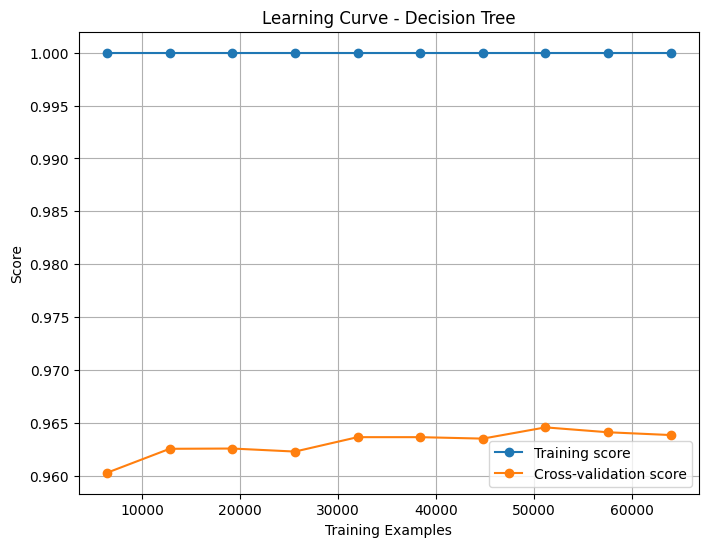

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    dt_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score', marker='o')
plt.title('Learning Curve - Decision Tree')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# 3. Random Forest Classifer

In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11860
         QSO       0.97      0.93      0.95      3797
        STAR       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

Accuracy: 0.97805


In [25]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


In [26]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_tuned_rf))
print("Accuracy (Tuned Model):", accuracy_score(y_test, y_pred_tuned_rf))


Tuned Random Forest Classifier Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11860
         QSO       0.96      0.93      0.94      3797
        STAR       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000

Accuracy (Tuned Model): 0.9775


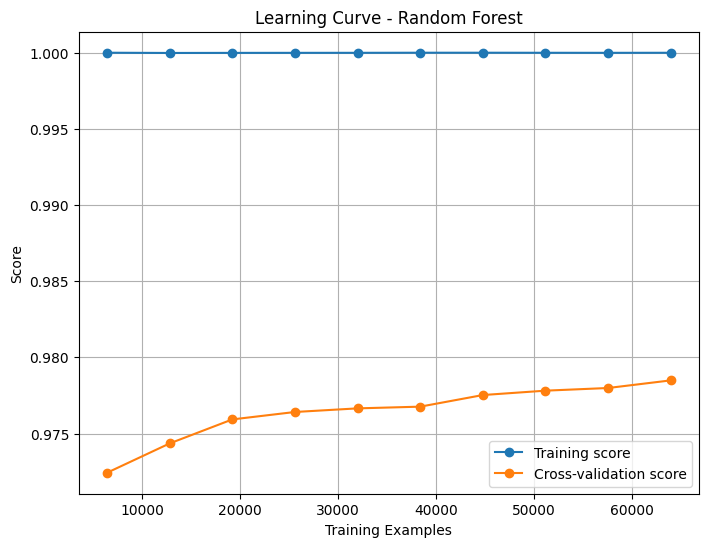

In [27]:
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score', marker='o')

plt.title('Learning Curve - Random Forest')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()

plt.show()


# 4. Light GBM Classifier

In [30]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3802
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 16
[LightGBM] [Info] Start training from score -0.519509
[LightGBM] [Info] Start training from score -1.663102
[LightGBM] [Info] Start training from score -1.534157
LightGBM Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11860
         QSO       0.96      0.93      0.95      3797
        STAR       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000

Accuracy: 0.9786


In [31]:
param_grid_lgbm = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}
grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid_lgbm, cv=3)
grid_search_lgbm.fit(X_train, y_train)
print("Best Parameters:", grid_search_lgbm.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [32]:
best_lgbm_model = grid_search_lgbm.best_estimator_
y_pred_tuned_lgbm = best_lgbm_model.predict(X_test)

print("Tuned LightGBM Performance:")
print(classification_report(y_test, y_pred_tuned_lgbm))
print("Accuracy (Tuned Model):", accuracy_score(y_test, y_pred_tuned_lgbm))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Tuned LightGBM Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11860
         QSO       0.96      0.93      0.95      3797
        STAR       0.99      1.00      1.00      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000

Accuracy (Tuned Model): 0.97875


In [33]:
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

accuracy_scores = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_lgbm]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3794
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 16
[LightGBM] [Info] Start training from score -0.524988
[LightGBM] [Info] Start training from score -1.625980
[LightGBM] [Info] Start training from score -1.552497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3800
[LightGBM] [Info] Number of data points in the train set: 12800, number of used features: 16
[LightGBM] [Info] Start training from score -0.512911
[LightGBM] [Info] Start training from score -1.657037
[LightGBM] [Info] Start training from score -1.558047
[LightGBM] [Info] Auto-c

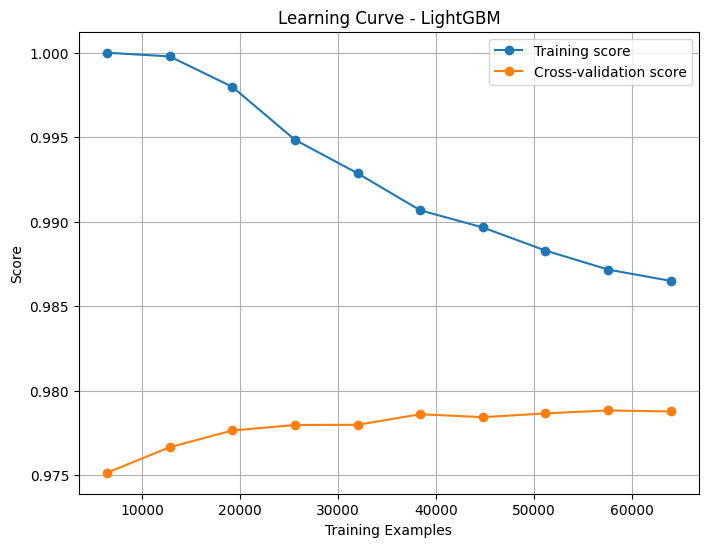

In [34]:
train_sizes, train_scores, val_scores = learning_curve(
    lgbm_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', marker='o')
plt.plot(train_sizes, val_scores_mean, label='Cross-validation score', marker='o')

plt.title('Learning Curve - LightGBM')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

### Comparison between all 4 algorithms

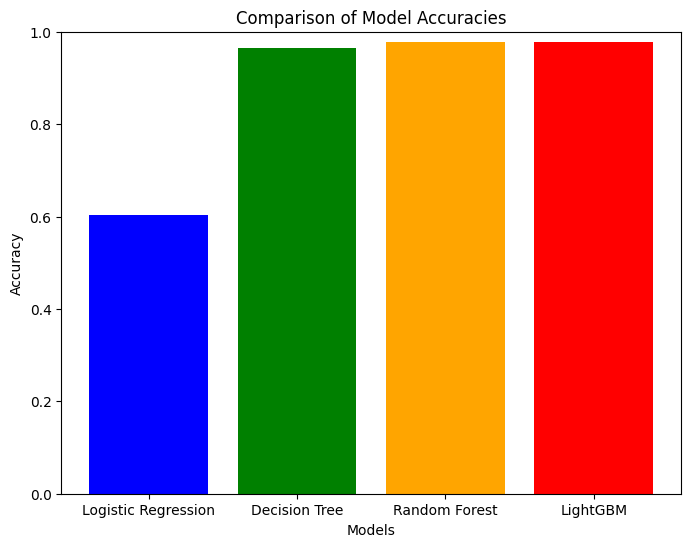

In [35]:
accuracy_scores = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_lgbm]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()